In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
import sweetviz as sv

Analyze

In [28]:

train_fn = "./data/train.csv"
test_fn = "./data/test.csv"

def readData(fname):
    df = pd.read_csv(fname)

    return df

train_df = readData(train_fn)
test_df = readData(test_fn)

In [29]:

print(train_df.describe())
train_df.info(False)
print(train_df.dtypes)
#heatmap correlation
#print(df.corr())
#sns.pairplot(df)
#sns.heatmap(df.corr(), annot=True)
#plt.show()

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [30]:
col_float = train_df.select_dtypes(include='float64')
col_float.head()
col_float.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


1460 entries, 81 features, more than half of the features are not a number type. Let us see the `object` columns.

In [31]:
col_int = train_df.select_dtypes(include='int64')
col_int.head()
col_int.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [32]:
col_object =  train_df.select_dtypes(include='object')
col_object.head()
col_object.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [33]:
col_object.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


From the head and the describtion of the object only features dataframe, we can see for example for the feature `Alley`, that we have 2 different values, and only 91 of the entries have a non NaN value.

The keep the dataset coherent and efficient, we will change the 'object' features to 'category'

In [34]:
def object_to_category(df):
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

object_to_category(train_df)
print(train_df.dtypes)
print(train_df.describe())


Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

   

In [35]:
def category_to_code(df):
    for col in df.select_dtypes(include='category').columns:
        df[col] = df[col].cat.codes

category_to_code(train_df)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000


SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
                  ...   
GarageFinish   -0.381497
HeatingQC      -0.471338
BsmtQual       -0.479974
KitchenQual    -0.569857
ExterQual      -0.633315
Name: SalePrice, Length: 81, dtype: float64


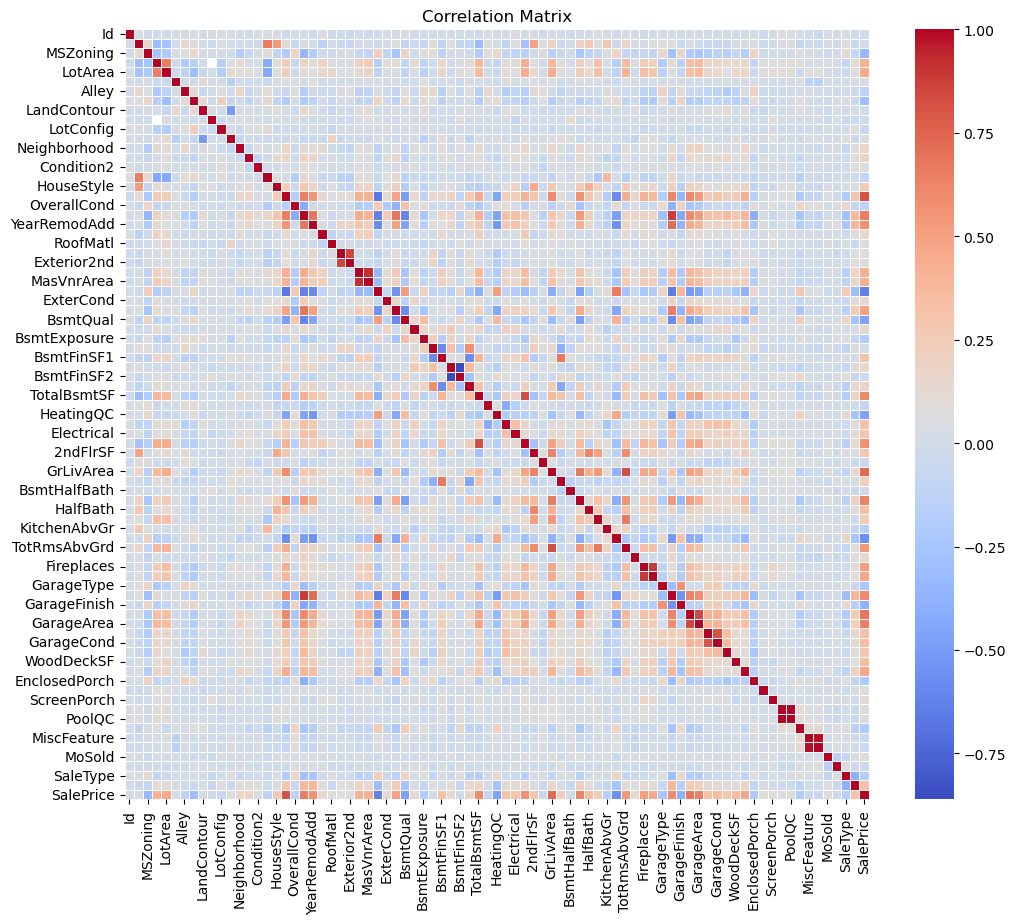

In [39]:
correlations = train_df.corr(method='spearman')

corr_saleprice = correlations["SalePrice"].sort_values(ascending=False)
print(corr_saleprice)

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


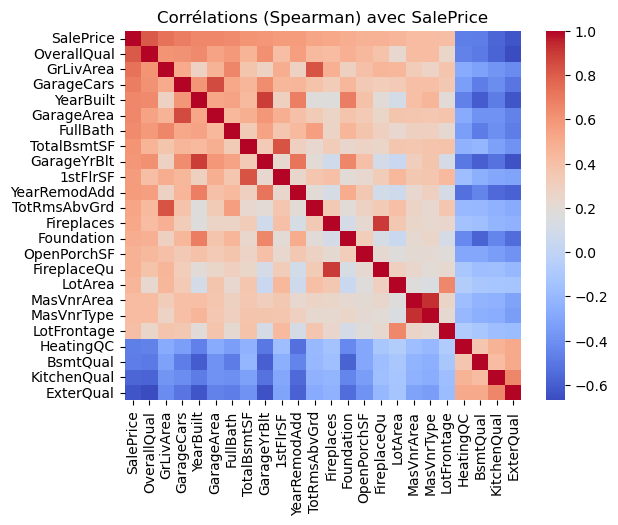

In [ ]:
top_features = corr_saleprice[abs(corr_saleprice) > 0.4].index
sns.heatmap(train_df[top_features].corr(method='spearman'), annot=False, cmap="coolwarm")
plt.title("Spearman Correlation of features > 0.4")
plt.show()